# Aprendizagem de Máquina - Relatório 1


## Questão 1


### Objetivos

Nesta questão, o objetivo é desenvolver um algoritmo que implemente o classificador k-NN com peso e sem peso. Logo após, o desempenho do classificador é avaliado utilizando dois datasets com atributos numéricos, onde será mostrado o comportamento para diferentes valores de k.

### Metodologia

Para a avaliação do algoritmo proposto pela questão, foram utilizados duas bases de dados obtidas no Promise Repository (http://promise.site.uottawa.ca/SERepository/datasets-page.html). O primeiro deles foi o "KC2/Software defect prediction" e o segundo foi o "JM1/Software defect prediction".
As duas bases de dados estavam contidas cada uma em um arquivo ARFF (Atribute-Relation File Format), onde cada linha representa uma instância e as colunas representam os atributos juntamente com as classes.
Para a leitura deste formato de arquivo foi utilizado o método arff da biblioteca Scipy para Python assim como a biblioteca Pandas que é voltada para a análise de dados. A biblioteca Matplotlib também foi utilizada para gerar os gráficos utilizados na análise.

In [49]:
%matplotlib inline

from src.knn import *
import datetime
from scipy.io import arff
import matplotlib.pyplot as plt
import datetime

time = []

Abaixo segue um resumo da primeira base de dados:

In [2]:
data_1 = arff.loadarff('datasets/kc2.arff')
df_1 = pd.DataFrame(data_1[0])
print("KC2/Software defect prediction")
df_1.head()

KC2/Software defect prediction


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'no'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'yes'
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,b'yes'
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,b'yes'
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,b'yes'


In [3]:
df_1.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,36.894828,4.893487,2.447126,3.650192,94.630843,555.472644,0.274464,9.735287,28.320441,1.854299e+04,...,1094.811456,27.772031,2.000000,4.339080,0.281609,9.197701,14.465900,57.611494,37.023372,8.765134
std,77.944048,10.976772,6.665003,8.054860,233.230165,1817.468320,0.275609,11.088640,32.225597,1.132712e+05,...,7556.521581,64.431485,5.582052,9.214753,1.038236,6.360180,22.086661,142.990741,90.398620,21.942779
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,1.000000,5.000000,11.610000,0.060000,1.500000,7.740000,1.741000e+01,...,0.970000,2.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,1.000000
50%,13.000000,2.000000,1.000000,2.000000,27.000000,109.205000,0.140000,6.000000,20.560000,6.135900e+02,...,34.090000,8.000000,0.000000,1.000000,0.000000,8.000000,7.000000,16.500000,11.000000,3.000000
75%,45.000000,5.000000,1.000000,4.000000,104.750000,543.787500,0.500000,14.610000,38.365000,7.624085e+03,...,423.562500,33.750000,2.000000,5.000000,0.000000,14.000000,20.000000,64.000000,41.000000,9.000000
max,1275.000000,180.000000,125.000000,143.000000,3982.000000,33814.560000,2.000000,103.530000,415.060000,2.147484e+06,...,153047.010000,1107.000000,44.000000,121.000000,11.000000,47.000000,325.000000,2469.000000,1513.000000,361.000000


Podemos notar um desbalanceamento das classes no gráfico exibido abaixo:

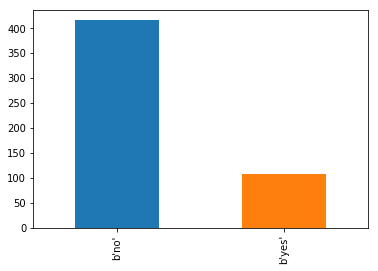

In [4]:
df_1['problems'].value_counts().plot(kind='bar')

Agora analisando a segunda base de dados, temos:

In [51]:
data_2 = arff.loadarff('datasets/jm1.arff')
df_2 = pd.DataFrame(data_2[0])
print("JM1/Software defect prediction")
df_2.head()

JM1/Software defect prediction


,loc,v(g),ev(g),iv(g),n,...,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,...,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,b'true'
2,72.0,7.0,1.0,6.0,198.0,...,36.0,112.0,86.0,13.0,b'true'
3,190.0,3.0,1.0,3.0,600.0,...,135.0,329.0,271.0,5.0,b'true'
4,37.0,4.0,1.0,4.0,126.0,...,16.0,76.0,50.0,7.0,b'true'


In [6]:
df_2.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,...,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,...,2.046465e+03,26.252274,2.737529,4.62554,0.370785,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,...,2.413154e+04,59.611201,9.008608,9.96813,1.907969,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.00000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.00000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,...,6.342500e+02,28.000000,2.000000,5.00000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.00000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


Assim como a primeira base de dados, podemos observar aqui também uma desproporção entre as classes do problema:

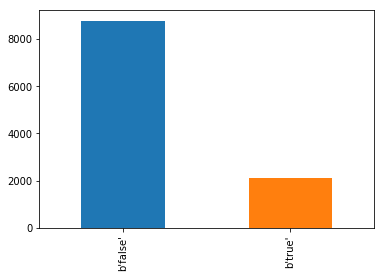

In [7]:
df_2['defects'].value_counts().plot(kind='bar')

O algoritmo do k-NN foi implementado também em Python e se encontra do diretório "src/". Neste diretório encontram-se dois arquivos: distances.py e knn.py, onde o primeiro implementa as distâncias utilizadas nesta e nas próximas questões e o último é a implementação do classificador k-NN.

### Resultados

Para a avaliação dos classificadores k-NN com e sem peso, cada base de dados foi submetida ao k-fold cross validation, onde o valor escolhido para k foi 10. Cada classificador executou para os números de vizinhos k = {1,2,3,5,7,9,11,13,15}.
As acurácias obtidas utilizando a primeira base de dados seguem abaixo:

In [8]:
n_fold = 10
k_values = [1,2,3,5,7,9,11,13,15]

data_1 = df_1.values
np.random.shuffle(data_1)

mod = data_1.shape[0] % n_fold
data_1 = data_1[mod:]

accs = []
weighted_accs = []

print("---------------------KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_1, n_fold, k_values)
time.append(datetime.datetime.now() - cur)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

print("\n---------------------WEIGHTED KNN---------------------")
cur = datetime.datetime.now()
weighted_accs = cross_validation(data_1, n_fold, k_values, with_weight=True)
time.append(datetime.datetime.now() - cur)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], weighted_accs[i]))

---------------------KNN---------------------
The accuracy for k = 1 is: 75.19%
The accuracy for k = 2 is: 80.19%
The accuracy for k = 3 is: 80.19%
The accuracy for k = 5 is: 81.73%
The accuracy for k = 7 is: 81.92%
The accuracy for k = 9 is: 82.31%
The accuracy for k = 11 is: 82.31%
The accuracy for k = 13 is: 81.92%
The accuracy for k = 15 is: 81.92%

---------------------WEIGHTED KNN---------------------
The accuracy for k = 1 is: 75.19%
The accuracy for k = 2 is: 77.50%
The accuracy for k = 3 is: 78.27%
The accuracy for k = 5 is: 79.62%
The accuracy for k = 7 is: 80.00%
The accuracy for k = 9 is: 80.38%
The accuracy for k = 11 is: 80.58%
The accuracy for k = 13 is: 81.15%
The accuracy for k = 15 is: 81.15%


A comparação dos dois classificadores variando o número de vizinhos pode ser visualizada no gráfico abaixo:

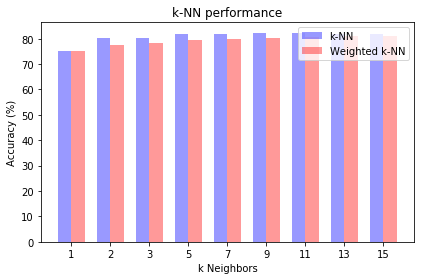

In [24]:
fig, ax = plt.subplots()

index = np.arange(len(k_values))
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, accs, bar_width,
                alpha=opacity, color='b',
                label='k-NN')

rects2 = ax.bar(index + bar_width, weighted_accs,
                bar_width, color='r',
                alpha=opacity, label='Weighted k-NN')

ax.set_xlabel('k Neighbors')
ax.set_ylabel('Accuracy (%)')
ax.set_title('k-NN Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '5', '7', '9', '11', '13', '15'))
ax.legend()

fig.tight_layout()
plt.show()

Agora avaliando a segunda base de dados:

In [ ]:
n_fold = 10
k_values = [1,2,3,5,7,9,11,13,15]

data_2 = df_2.values
np.random.shuffle(data_2)

mod = data_2.shape[0] % n_fold
data_2 = data_2[mod:]

accs = []
weighted_accs = []

print("---------------------KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_2, n_fold, k_values)
time.append(datetime.datetime.now() - cur)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

print("\n---------------------WEIGHTED KNN---------------------")
cur = datetime.datetime.now()
weighted_accs = cross_validation(data_2, n_fold, k_values, with_weight=True)
time.append(datetime.datetime.now() - cur)
for i in range(len(k_values)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], weighted_accs[i]))

## Questão 2


### Objetivos

Nesta questão, o objetivo é desenvolver um algoritmo que implemente o classificador k-NN com peso e sem peso utilizando a distância VDM . Logo após, o desempenho do classificador é avaliado utilizando dois datasets com atributos categóricos, onde será mostrado o comportamento para diferentes valores de k.

### Metodologia

Para a avaliação do algoritmo proposto pela questão, foram utilizados duas bases de dados obtidas no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html). O primeiro deles foi o "Chess (King-Rook vs. King-Pawn)" e o segundo foi o "Tic-Tac-Toe Endgame Data Set".
As duas bases de dados estavam contidas cada uma em um arquivo .DATA, onde cada linha representa uma instância e as colunas representam os atributos juntamente com as classes.
Para a leitura deste formato de arquivo foi utilizado a biblioteca Pandas. A biblioteca Matplotlib também foi utilizada para gerar os gráficos utilizados na análise.
Abaixo segue um resumo da primeira base de dados:

In [26]:
df_1 = pd.read_csv('datasets/chess.data')
pd.set_option('display.max_columns', df.shape[1])
df_1.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,C
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won


In [27]:
df_1.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,C
count,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
freq,2839,2971,3076,2874,2129,1722,2026,2500,1980,2225,1817,2860,2205,3181,2526,3040,3099,2196,3170,2714,2612,2556,3013,1975,3185,2216,3021,3195,3149,3060,2631,3021,1984,2007,2345,2407,1669


Podemos notar que as classes estão bem distribuídas através do gráfico abaixo:

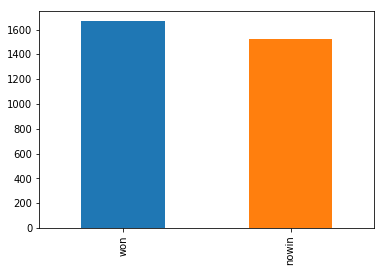

In [29]:
df_1['C'].value_counts().plot(kind='bar')

Agora analisando a segunda base de dados, temos:

In [53]:
df_2 = pd.read_csv('datasets/tic-tac-toe.data')
pd.set_option('display.max_columns', df_2.shape[1])
df_2.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,C
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [38]:
df_2.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,C
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


Observando o gráfico abaixo pode-se notar um certo desbalanceamento entre as classes:

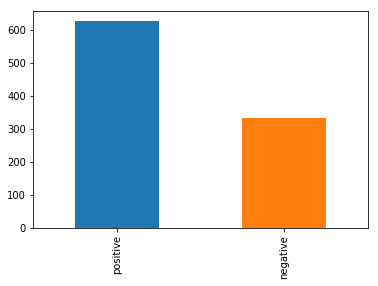

In [39]:
df_2['C'].value_counts().plot(kind='bar')

### Resultados

Para a avaliação dos classificadores k-NN com e sem peso, cada base de dados foi submetida ao k-fold cross validation, onde o valor escolhido para k foi 10. Cada classificador executou para os números de vizinhos k = {1,2,3,5,7,9,11,13,15}.
As acurácias obtidas utilizando a primeira base de dados seguem abaixo:

In [30]:
n_fold = 10
data_1 = df_1.values
np.random.shuffle(data_1)
mod = data_1.shape[0] % n_fold
data_1 = data_1[mod:]

k_values = [1,2,3,5,7,9,11,13,15]
accs = []
weighted_accs = []

print("---------------------KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_1, n_fold, k_values, data_type=1, dataframe=df)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

print("---------------------WEIGHTED KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_1, n_fold, k_values, data_type=1, dataframe=df, with_weight=True)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

The accuracy for k = 1 is: 96.99%
The accuracy for k = 2 is: 96.77%
The accuracy for k = 3 is: 96.74%
The accuracy for k = 5 is: 96.96%
The accuracy for k = 7 is: 96.46%
The accuracy for k = 9 is: 96.46%
The accuracy for k = 11 is: 96.08%
The accuracy for k = 13 is: 96.08%
The accuracy for k = 15 is: 95.92%


Abaixo seguem os resultados para a segunda base de dados:

In [54]:
data_2 = df_2.values
np.random.shuffle(data_2)
mod = data_2.shape[0] % n_fold
data_2 = data_2[mod:]

print("---------------------KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_2, n_fold, k_values, data_type=1, dataframe=df_2)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

print("---------------------WEIGHTED KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_2, n_fold, k_values, data_type=1, dataframe=df_2, with_weight=True)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))

---------------------KNN---------------------
The accuracy for k = 1 is: 93.47%
The accuracy for k = 2 is: 91.16%
The accuracy for k = 3 is: 90.21%
The accuracy for k = 5 is: 93.05%
The accuracy for k = 7 is: 90.63%
The accuracy for k = 9 is: 91.58%
The accuracy for k = 11 is: 90.53%
The accuracy for k = 13 is: 89.26%
The accuracy for k = 15 is: 90.00%
---------------------WEIGHTED KNN---------------------
The accuracy for k = 1 is: 93.47%
The accuracy for k = 2 is: 93.05%
The accuracy for k = 3 is: 90.95%
The accuracy for k = 5 is: 92.84%
The accuracy for k = 7 is: 91.05%
The accuracy for k = 9 is: 91.58%
The accuracy for k = 11 is: 91.16%
The accuracy for k = 13 is: 90.95%
The accuracy for k = 15 is: 91.16%


## Questão 3


### Objetivos

Nesta questão, o objetivo é desenvolver um algoritmo que implemente o classificador k-NN com peso e sem peso utilizando a distância HVDM . Logo após, o desempenho do classificador é avaliado utilizando dois datasets com atributos numéŕicos e categóricos, onde será mostrado o comportamento para diferentes valores de k.

### Metodologia

Para a avaliação do algoritmo proposto pela questão, foram utilizados duas bases de dados obtidas no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets.html). O primeiro deles foi o "Statlog (German Credit Data)" e o segundo foi o "Fulano de tal".
As duas bases de dados estavam contidas cada uma em um arquivo .DATA, onde cada linha representa uma instância e as colunas representam os atributos juntamente com as classes.
Para a leitura deste formato de arquivo foi utilizado a biblioteca Pandas. A biblioteca Matplotlib também foi utilizada para gerar os gráficos utilizados na análise.
Abaixo segue um resumo da primeira base de dados:

In [41]:
df_1 = pd.read_csv('datasets/german_credit.data')
pd.set_option('display.max_columns', df_1.shape[1])
df_1.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,C
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [42]:
df_1.describe()

,P2,P5,P8,P11,P13,P16,P18,C
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


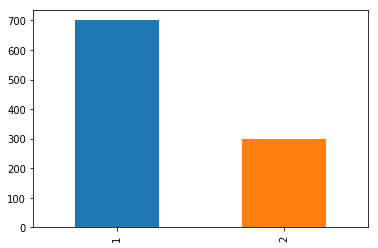

In [44]:
df_1['C'].value_counts().plot(kind='bar')

### Resultados

Para a avaliação dos classificadores k-NN com e sem peso, cada base de dados foi submetida ao k-fold cross validation, onde o valor escolhido para k foi 10. Cada classificador executou para os números de vizinhos k = {1,2,3,5,7,9,11,13,15}.
As acurácias obtidas utilizando a primeira base de dados seguem abaixo:

In [46]:
n_fold = 10
data_1 = df_1.values
np.random.shuffle(data_1)
mod = data_1.shape[0] % n_fold
data_1 = data_1[mod:]

k_values = [1,2,3,5,7,9,11,13,15]
accs = []
weighted_accs = []

print("---------------------KNN---------------------")
cur = datetime.datetime.now()
accs = cross_validation(data_1, n_fold, k_values, data_type=2, dataframe=df_1)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], accs[i]))
    
print("\n---------------------WEIGHTED KNN---------------------")
cur = datetime.datetime.now()
weighted_accs = cross_validation(data_1, n_fold, k_values, data_type=2, dataframe=df_1, with_weight=True)
time.append(datetime.datetime.now() - cur)
for i in range(len(accs)):
    print("The accuracy for k = {:d} is: {:.2f}%".format(k_values[i], weighted_accs[i]))

---------------------KNN---------------------
The accuracy for k = 1 is: 70.30%
The accuracy for k = 2 is: 72.00%
The accuracy for k = 3 is: 72.90%
The accuracy for k = 5 is: 74.00%
The accuracy for k = 7 is: 74.40%
The accuracy for k = 9 is: 73.40%
The accuracy for k = 11 is: 73.50%
The accuracy for k = 13 is: 74.00%
The accuracy for k = 15 is: 73.50%

---------------------WEIGHTED KNN---------------------
The accuracy for k = 1 is: 70.30%
The accuracy for k = 2 is: 70.30%
The accuracy for k = 3 is: 72.80%
The accuracy for k = 5 is: 74.30%
The accuracy for k = 7 is: 74.70%
The accuracy for k = 9 is: 73.90%
The accuracy for k = 11 is: 74.10%
The accuracy for k = 13 is: 74.30%
The accuracy for k = 15 is: 74.00%
